https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning/overview
## LearnPlatform COVID-19 Impact on Digital Learning
Use digital learning data to analyze the impact of COVID-19 on student learning

### Problem Statement
The COVID-19 Pandemic has disrupted learning for more than 56 million students in the United States. In the Spring of 2020, most states and local governments across the U.S. closed educational institutions to stop the spread of the virus. In response, schools and teachers have attempted to reach students remotely through distance learning tools and digital platforms. Until today, concerns of the exacaberting digital divide and long-term learning loss among America’s most vulnerable learners continue to grow.

Challenge
We challenge the Kaggle community to explore (1) the state of digital learning in 2020 and (2) how the engagement of digital learning relates to factors such as district demographics, broadband access, and state/national level policies and events.

We encourage you to guide the analysis with questions that are related to the themes that are described above (in bold font). Below are some examples of questions that relate to our problem statement:

What is the picture of digital connectivity and engagement in 2020?
What is the effect of the COVID-19 pandemic on online and distance learning, and how might this also evolve in the future?
How does student engagement with different types of education technology change over the course of the pandemic?
How does student engagement with online learning platforms relate to different geography? Demographic context (e.g., race/ethnicity, ESL, learning disability)? Learning context? Socioeconomic status?
Do certain state interventions, practices or policies (e.g., stimulus, reopening, eviction moratorium) correlate with the increase or decrease online engagement?


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
df2 = pd.read_csv('products_info.csv')
df2.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [3]:
df1 = pd.read_csv('districts_info.csv')
df1.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.shape

(233, 7)

In [5]:
df1['state'].unique()

array(['Illinois', nan, 'Utah', 'Wisconsin', 'North Carolina', 'Missouri',
       'Washington', 'Connecticut', 'Massachusetts', 'New York',
       'Indiana', 'Virginia', 'Ohio', 'New Jersey', 'California',
       'District Of Columbia', 'Minnesota', 'Arizona', 'Texas',
       'Tennessee', 'Florida', 'North Dakota', 'New Hampshire',
       'Michigan'], dtype=object)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [7]:
df1.isna().sum()

district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64

In [8]:
df1.describe()

,district_id
count,233.000000
mean,5219.776824
std,2595.751581
min,1000.000000
25%,2991.000000
50%,4937.000000
75%,7660.000000
max,9927.000000


In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()  
df1['state']= label_encoder.fit_transform(df1['state'])  
df1['state'].unique()

array([ 5, 23, 19, 22, 14, 10, 21,  2,  7, 13,  6, 20, 16, 12,  1,  3,  9,
        0, 18, 17,  4, 15, 11,  8])

<AxesSubplot:>

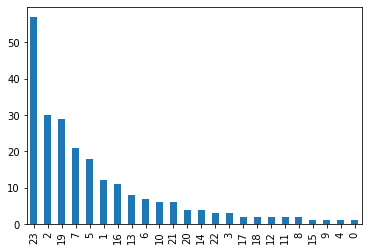

In [10]:
df1['state'].value_counts().plot(kind='bar')

In [11]:
df1['state'].isnull().sum()

0

In [12]:
new_df = df1.iloc[: , 3:7].copy() 

In [13]:
new_df.head()

,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,NaN,NaN,NaN,NaN
2,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [14]:
df1['pct_black/hispanic'] = df1['pct_black/hispanic'].str.strip('[')
df1[['pct_black', 'hispanic']] = df1['pct_black/hispanic'].str.split(',', expand=True)
df1[['pct_black', 'hispanic']].head()

,pct_black,hispanic
0,0,0.2
1,NaN,NaN
2,0,0.2
3,NaN,NaN
4,NaN,NaN


In [15]:
df1['pct_free/reduced'] = df1['pct_free/reduced'].str.strip('[')
df1[['pct_free','reduced']] = df1['pct_free/reduced'].str.split(',', expand=True)
df1[['pct_free','reduced']].head()

,pct_free,reduced
0,0,0.2
1,NaN,NaN
2,0.2,0.4
3,NaN,NaN
4,NaN,NaN


In [16]:
df1['county_connections_ratio'] = df1['county_connections_ratio'].str.strip('[')
df1[['Country1','Country2']] = df1['county_connections_ratio'].str.split(',', expand=True)
df1[['Country1','Country2']].head()

,Country1,Country2
0,0.18,1
1,NaN,NaN
2,0.18,1
3,NaN,NaN
4,NaN,NaN


In [17]:
df1['pp_total_raw'] = df1['pp_total_raw'].str.strip('[')
df1[['local_exp','federal_exp']] = df1['pp_total_raw'].str.split(',', expand=True)
df1[['local_exp','federal_exp']].head()

,local_exp,federal_exp
0,14000,16000
1,NaN,NaN
2,6000,8000
3,NaN,NaN
4,NaN,NaN


In [18]:
#'pct_black', 'hispanic11','pct_free','reduced','Country1','Country2','local_exp','federal_exp'],axis=1)
df= df1.drop(['district_id','locale','pct_black/hispanic','pct_free/reduced','county_connections_ratio','pp_total_raw'],axis=1)
df.head()

,state,pct_black,hispanic,pct_free,reduced,Country1,Country2,local_exp,federal_exp
0,5,0,0.2,0,0.2,0.18,1,14000,16000
1,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19,0,0.2,0.2,0.4,0.18,1,6000,8000
3,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   state        233 non-null    int32 
 1   pct_black    176 non-null    object
 2   hispanic     176 non-null    object
 3   pct_free     148 non-null    object
 4   reduced      148 non-null    object
 5   Country1     162 non-null    object
 6   Country2     162 non-null    object
 7   local_exp    118 non-null    object
 8   federal_exp  118 non-null    object
dtypes: int32(1), object(8)
memory usage: 15.6+ KB


In [20]:
df['hispanic']=pd.to_numeric(df['hispanic'])
df['pct_black']=pd.to_numeric(df['pct_black'])
df['reduced']=pd.to_numeric(df['reduced'])
df['pct_free']=pd.to_numeric(df['pct_free'])
df['Country1']=pd.to_numeric(df['Country1'])
df['Country2']=pd.to_numeric(df['Country2'])
df['local_exp']=pd.to_numeric(df['local_exp'])
df['federal_exp']=pd.to_numeric(df['federal_exp'])

### df['hispanic']

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hispanic', ylabel='Density'>

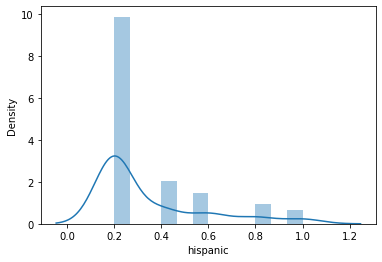

In [21]:
sns.distplot(df['hispanic'])  

In [22]:
df['hispanic']= df['hispanic'].fillna(df['hispanic'].mean())

In [23]:
df['hispanic'].skew()
df['hispanic'] =np.log(df['hispanic'])

<AxesSubplot:>

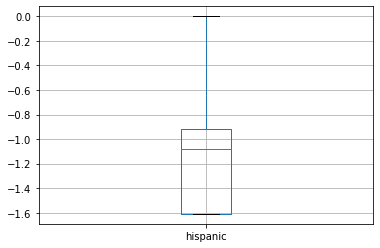

In [24]:
df.boxplot(column='hispanic')

## df['pct_black']

In [25]:
df['pct_black']=pd.to_numeric(df['pct_black'])
df['pct_black'].value_counts()

0.0    116
0.2     24
0.4     17
0.6     11
0.8      8
Name: pct_black, dtype: int64

<AxesSubplot:>

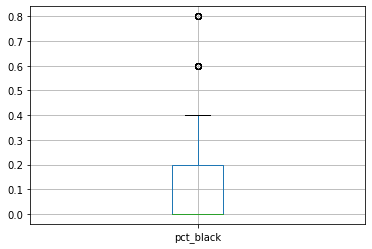

In [26]:
df.boxplot(column='pct_black')

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pct_black', ylabel='Density'>

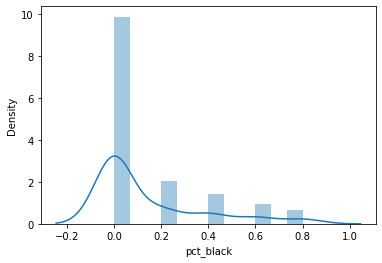

In [27]:
df['pct_black'].isnull().sum()
sns.distplot(df['pct_black'])

In [28]:
df['pct_black']= df['pct_black'].fillna(df['pct_black'].mean())
df['pct_black'].isnull().sum()

0

In [29]:
df['pct_black'].skew()

1.8152645131729424

In [30]:
df['pct_black']=np.sqrt(df[['pct_black']])
df['pct_black'].skew()

0.6310460871594203

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pct_black', ylabel='Density'>

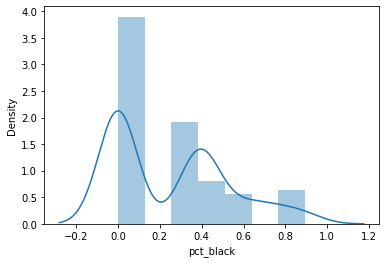

In [31]:
sns.distplot(df['pct_black'])

## df['reduced']

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reduced', ylabel='Density'>

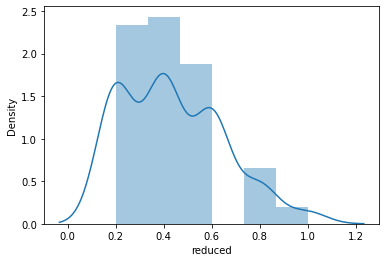

In [32]:
sns.distplot(df['reduced'])

In [33]:
df['reduced'].isnull().sum()

85

In [34]:
df['reduced']=df['reduced'].fillna(df['reduced'].mean())
df['reduced'].isnull().sum()

0

<AxesSubplot:>

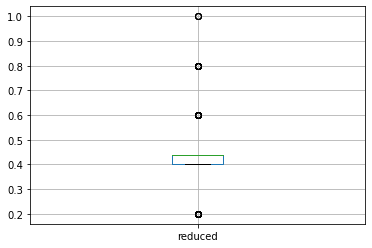

In [35]:
df.boxplot(column='reduced')

In [36]:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lower = q1 - (1.5*IQR)
    upper = q3 + (1.5*IQR)
    return lower,upper

In [37]:
lower,upper = remove_outlier(df['reduced'])
df['reduced']=np.where(df['reduced']>upper,upper,df['reduced'])
df['reduced']=np.where(df['reduced']<lower,lower,df['reduced'])

<AxesSubplot:>

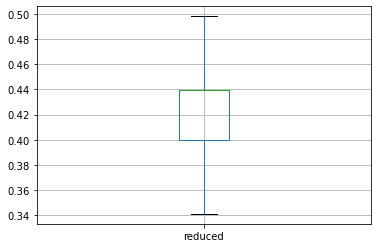

In [38]:
df.boxplot(column='reduced')

### df['pct_free']

In [39]:
df['pct_free'].isnull().sum()

85

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pct_free', ylabel='Density'>

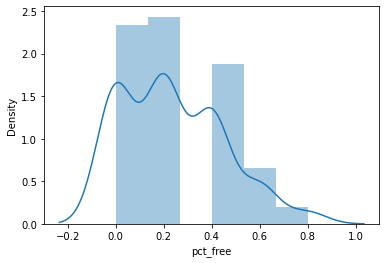

In [40]:
sns.distplot(df['pct_free'])

In [41]:
df['pct_free']=df['pct_free'].fillna(df['pct_free'].mean())

In [42]:
df['pct_free'].skew()

0.7568043178867595

<AxesSubplot:>

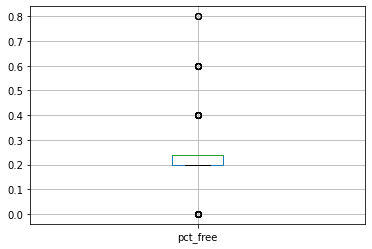

In [43]:
df.boxplot(column='pct_free')

### df['Country1']

In [44]:
df['Country1'].isnull().sum()

71

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Country1', ylabel='Density'>

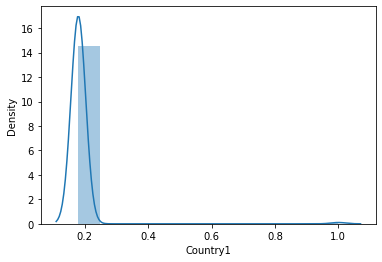

In [45]:
sns.distplot(df['Country1'])

In [46]:
df['Country1']=df['Country1'].fillna(df['Country1'].mean())
df['Country1'].isnull().sum()

0

In [47]:
df['Country1'].skew()

15.220799703687717

In [48]:
from scipy import stats
norm1=stats.boxcox(df['Country1'])[0]
pd.Series(norm1).skew()

1.0248936315920905

In [49]:
df['Country1']=stats.boxcox(df['Country1'])[0]

<AxesSubplot:>

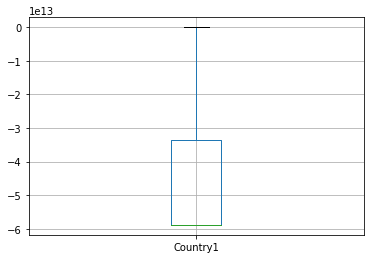

In [50]:
df.boxplot(column='Country1')

### df['Country2']

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Country2', ylabel='Density'>

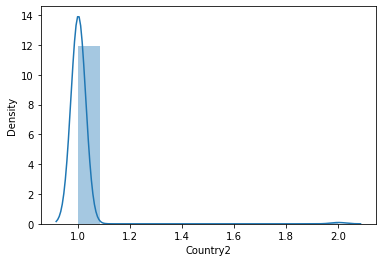

In [51]:
sns.distplot(df['Country2'])

In [52]:
df['Country2'].isnull().sum()

71

In [53]:
df['Country2'] = df['Country2'].fillna(df['Country2'].mean())
df['Country2'].isnull().sum()

0

In [54]:
df['Country2'].skew()

15.220799703687696

In [55]:
from scipy import stats
norm2=stats.boxcox(df['Country2'])[0]
pd.Series(norm2).skew()

1.391328142593772

In [56]:
df['Country2'] = stats.boxcox(df['Country2'])[0]

<AxesSubplot:>

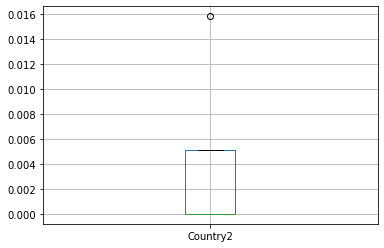

In [57]:
df.boxplot(column='Country2')

<AxesSubplot:>

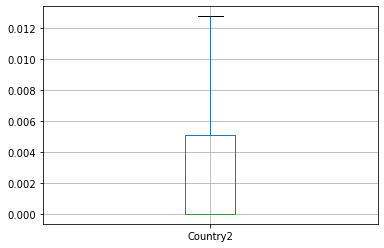

In [58]:
lower,upper = remove_outlier(df['Country2'])
df['Country2']=np.where(df['Country2']>upper,upper,df['Country2'])
df.boxplot(column='Country2')

### df['local_exp']

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='local_exp', ylabel='Density'>

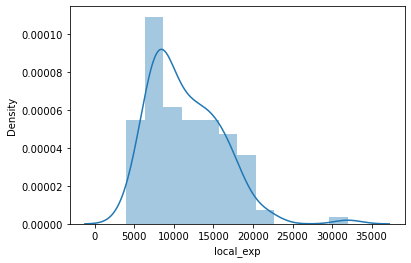

In [59]:
sns.distplot(df['local_exp'])

In [60]:
df['local_exp'].isnull().sum()

115

In [61]:
df['local_exp']= df['local_exp'].fillna(df['local_exp'].mean())
df['local_exp'].isnull().sum()

0

In [62]:
df['local_exp'].skew()

1.521274177619339

In [63]:
df['local_exp'] = np.log(df['local_exp'])
df['local_exp'].skew()

-0.4170396865514301

<AxesSubplot:>

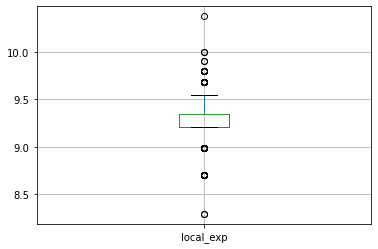

In [64]:
df.boxplot(column='local_exp')

<AxesSubplot:>

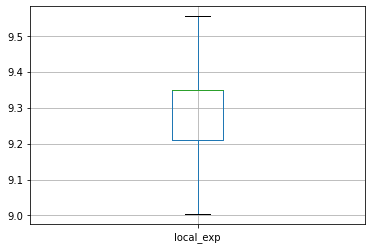

In [65]:
lower,upper = remove_outlier(df['local_exp'])
df['local_exp']=np.where(df['local_exp']>upper,upper,df['local_exp'])
df['local_exp']=np.where(df['local_exp']<lower,lower,df['local_exp'])
df.boxplot(column='local_exp')

### df['federal_exp']

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='federal_exp', ylabel='Density'>

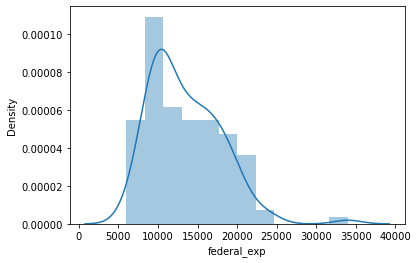

In [66]:
sns.distplot(df['federal_exp'])

In [67]:
df['federal_exp'].isnull().sum()

115

In [68]:
df['federal_exp']=df['federal_exp'].fillna(df['federal_exp'].mean())
df['federal_exp'].isnull().sum()

0

In [69]:
df['federal_exp'].skew()

1.521274177619339

In [70]:
df['federal_exp'] = np.log(df['federal_exp'])
df['federal_exp'].skew()

-0.1537047755278455

<AxesSubplot:>

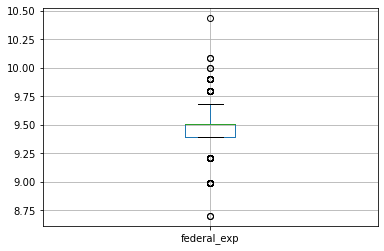

In [71]:
df.boxplot(column='federal_exp')

<AxesSubplot:>

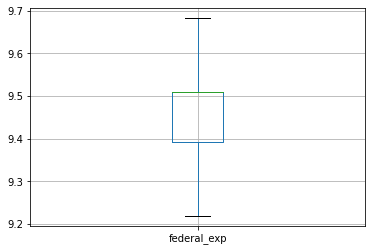

In [72]:
lower,upper = remove_outlier(df['federal_exp'])
df['federal_exp']=np.where(df['federal_exp']>upper,upper,df['federal_exp'])
df['federal_exp']=np.where(df['federal_exp']<lower,lower,df['federal_exp'])
df.boxplot(column='federal_exp')

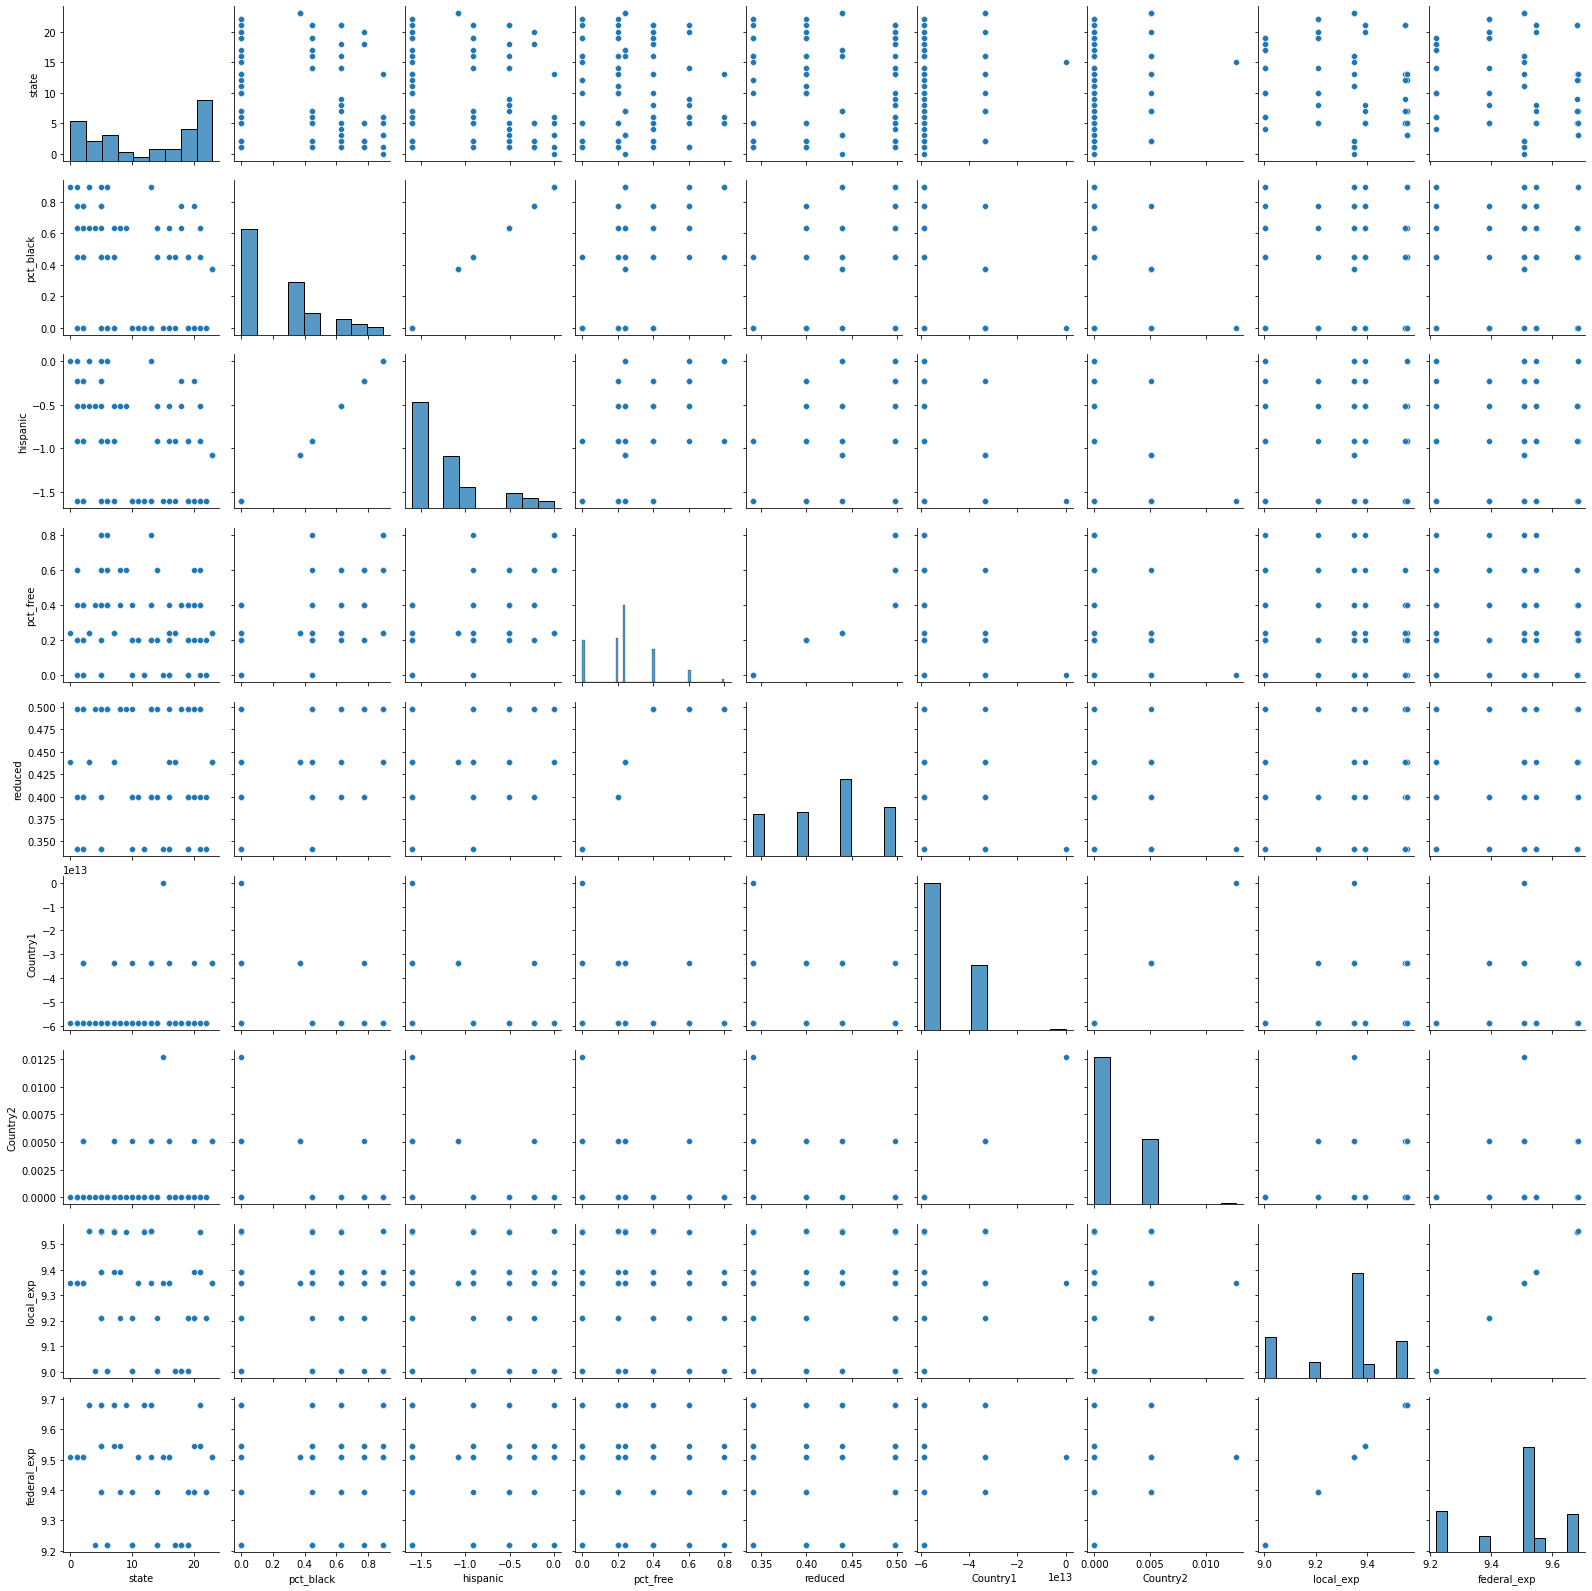

In [73]:
sns.pairplot(df)

In [74]:
df2 = pd.read_csv('products_info.csv')
df2.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [75]:
df2.shape

(372, 6)

In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


<AxesSubplot:>

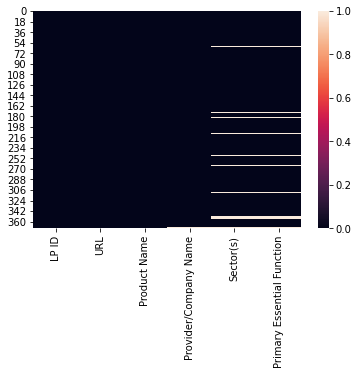

In [77]:
sns.heatmap(data=df2.isnull())

In [78]:
df2.dropna(inplace=True)
df2.isnull().sum()

LP ID                         0
URL                           0
Product Name                  0
Provider/Company Name         0
Sector(s)                     0
Primary Essential Function    0
dtype: int64

<AxesSubplot:>

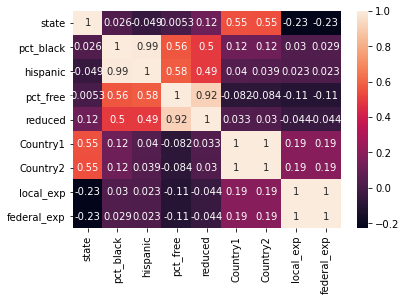

In [79]:
sns.heatmap(df.corr(),annot=True)

In [80]:
gkk = df.groupby(['state'])  
# Print the first value in each group
gkk.first()

,pct_black,hispanic,pct_free,reduced,Country1,Country2,local_exp,federal_exp
state,,,,,,,,
0,0.894427,0.000000,0.239189,0.439189,-5.885817e+13,0.000000,9.347889,9.508560
1,0.632456,-0.510826,0.200000,0.400000,-5.885817e+13,0.000000,9.347889,9.508560
2,0.000000,-1.609438,0.000000,0.341216,-5.885817e+13,0.000000,9.347889,9.508560
3,0.894427,0.000000,0.239189,0.439189,-5.885817e+13,0.000000,9.554212,9.682407
4,0.632456,-0.510826,0.400000,0.497973,-5.885817e+13,0.000000,9.004017,9.218815
5,0.000000,-1.609438,0.000000,0.341216,-5.885817e+13,0.000000,9.546813,9.680344
6,0.894427,0.000000,0.800000,0.497973,-5.885817e+13,0.000000,9.004017,9.218815
7,0.000000,-1.609438,0.239189,0.439189,-3.357287e+13,0.005100,9.554212,9.682407
8,0.632456,-0.510826,0.600000,0.497973,-5.885817e+13,0.000000,9.210340,9.392662


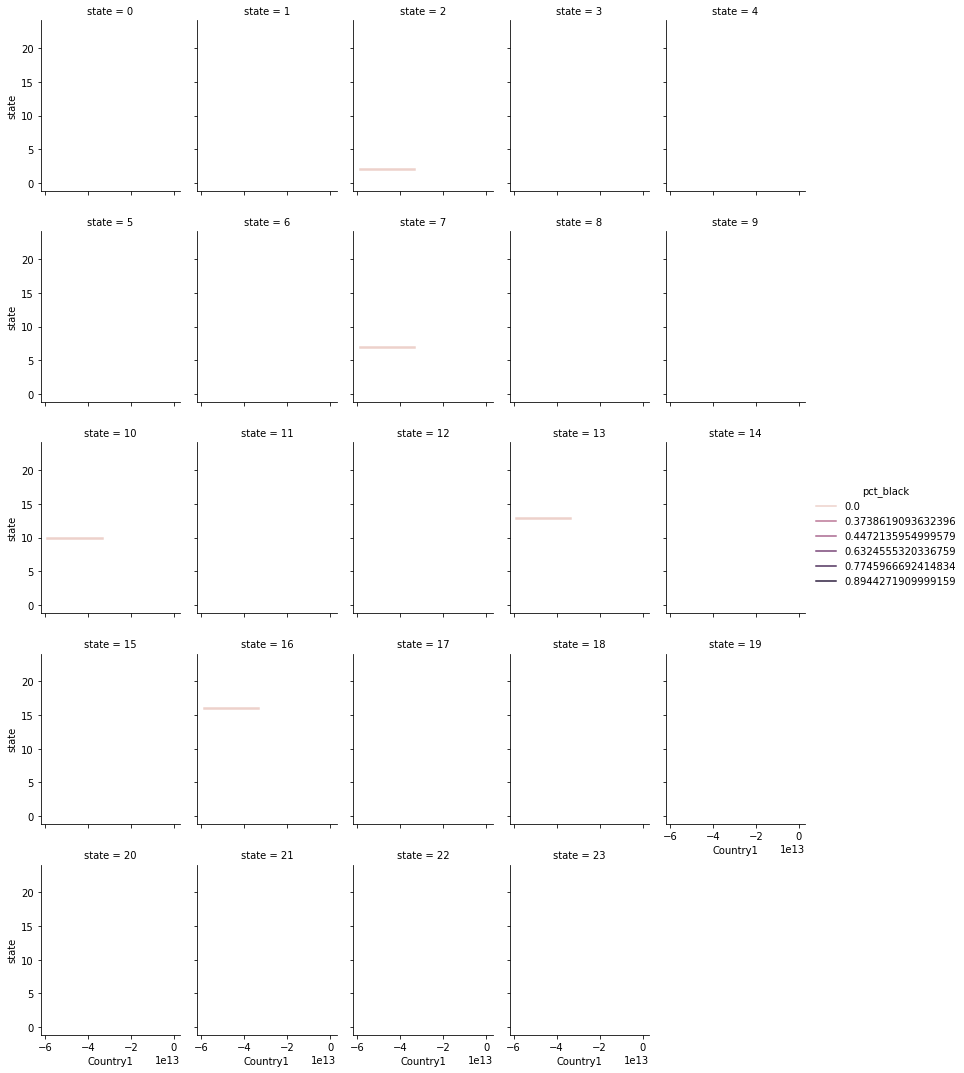

In [81]:
sns.relplot(x="Country1", y="state", hue="pct_black",
            col="state", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=df)

In [82]:
Dataframe_join = pd.concat([df,df2],axis=1)
Dataframe_join.head()

,state,pct_black,hispanic,pct_free,reduced,Country1,Country2,local_exp,federal_exp,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,5.0,0.000000,-1.609438,0.000000,0.341216,-5.885817e+13,0.0000,9.546813,9.680344,13117.0,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,23.0,0.373862,-1.079478,0.239189,0.439189,-3.357287e+13,0.0051,9.347889,9.508560,66933.0,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,19.0,0.000000,-1.609438,0.200000,0.400000,-5.885817e+13,0.0000,9.004017,9.218815,50479.0,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,23.0,0.373862,-1.079478,0.239189,0.439189,-3.357287e+13,0.0051,9.347889,9.508560,92993.0,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,23.0,0.373862,-1.079478,0.239189,0.439189,-3.357287e+13,0.0051,9.347889,9.508560,73104.0,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
